## AGUME KENNETH B30309 S24B38/017

In [127]:
import pandas as pd 

- Loading the dataset

In [128]:
data = pd.read_csv("assign.csv")
data

,"Timestamp,Energy_kWh"
0,"2025-01-01 00:00:00,4.2"
1,"2025-01-01 00:15:00,3.8"
2,"01-01-2025 00:30:00,3.9"
3,"2025-01-01 00:45:00,"
4,"2025-01-01 01:00:00,4.5"
5,"2025-01-01 01:30:00,4.1"
6,"2025-01-01 01:45:00,3.7"
7,"2025-01-01 02:00:00,NaN"
8,"2025-01-01 02:15:00,3.2"
9,"2025-01-01 02:30:00,3.1"


In [129]:
# splittinng the data so that the two columns appear separately
data[['Timestamp', 'Energy_kWh']] = data.iloc[:,0].str.split(',', expand=True)

# Remove extra spaces from Timestamp
data['Timestamp'] = data['Timestamp'].astype(str).str.strip()



In [130]:
# Dropping the old combined column
data = data.drop(columns=data.columns[0])
data

,Timestamp,Energy_kWh
0,2025-01-01 00:00:00,4.2
1,2025-01-01 00:15:00,3.8
2,01-01-2025 00:30:00,3.9
3,2025-01-01 00:45:00,
4,2025-01-01 01:00:00,4.5
5,2025-01-01 01:30:00,4.1
6,2025-01-01 01:45:00,3.7
7,2025-01-01 02:00:00,NaN
8,2025-01-01 02:15:00,3.2
9,2025-01-01 02:30:00,3.1


- Converting Timestap column to datetime

In [131]:
data['Timestamp'] = pd.to_datetime(data['Timestamp'], errors='coerce')
data

,Timestamp,Energy_kWh
0,2025-01-01 00:00:00,4.2
1,2025-01-01 00:15:00,3.8
2,NaT,3.9
3,2025-01-01 00:45:00,
4,2025-01-01 01:00:00,4.5
5,2025-01-01 01:30:00,4.1
6,2025-01-01 01:45:00,3.7
7,2025-01-01 02:00:00,NaN
8,2025-01-01 02:15:00,3.2
9,2025-01-01 02:30:00,3.1


In [133]:
data['Timestamp'].isna().sum()

2

## Handling the gaps

In [ ]:
# Setting Timestamp as the time index
data = data.set_index('Timestamp')
data

,Energy_kWh
Timestamp,
2025-01-01 00:00:00,4.2
2025-01-01 00:15:00,3.8
NaT,3.9
2025-01-01 00:45:00,
2025-01-01 01:00:00,4.5
2025-01-01 01:30:00,4.1
2025-01-01 01:45:00,3.7
2025-01-01 02:00:00,NaN
2025-01-01 02:15:00,3.2


- Creating a continous  15-minute time range 

In [140]:
full_time = pd.date_range(
    start=data.index.min(),
    end=data.index.max(),
    freq='15min'
)

In [142]:
# Convert Energy_kWh to numeric
data['Energy_kWh'] = pd.to_numeric(data['Energy_kWh'], errors='coerce')

In [143]:
# Handle duplicate timestamps by taking the mean
data = data.groupby(data.index).mean()
data

,Energy_kWh
Timestamp,
2025-01-01 00:00:00,4.2
2025-01-01 00:15:00,3.8
2025-01-01 00:45:00,NaN
2025-01-01 01:00:00,4.5
2025-01-01 01:30:00,4.1
2025-01-01 01:45:00,3.7
2025-01-01 02:00:00,NaN
2025-01-01 02:15:00,3.2
2025-01-01 02:30:00,3.1


In [144]:
# Reindexing the data to include missing time intervals
data = data.reindex(full_time)
data

,Energy_kWh
2025-01-01 00:00:00,4.2
2025-01-01 00:15:00,3.8
2025-01-01 00:30:00,NaN
2025-01-01 00:45:00,NaN
2025-01-01 01:00:00,4.5
...,...
2025-01-04 07:45:00,NaN
2025-01-04 08:00:00,7.1
2025-01-04 08:15:00,7.5
2025-01-04 08:30:00,NaN


# Handling the missing values

In [ ]:
# Fill missing Energy values using linear interpolation
data['Energy_kWh'] = data['Energy_kWh'].interpolate(method='linear')
data

,Energy_kWh
2025-01-01 00:00:00,4.200000
2025-01-01 00:15:00,3.800000
2025-01-01 00:30:00,4.033333
2025-01-01 00:45:00,4.266667
2025-01-01 01:00:00,4.500000
...,...
2025-01-04 07:45:00,7.085714
2025-01-04 08:00:00,7.100000
2025-01-04 08:15:00,7.500000
2025-01-04 08:30:00,7.850000


In [ ]:
# Check remaining missing values
data.isna().sum()

Energy_kWh    0
dtype: int64

- Missing energy consumption values created during reindexing have been estimated using linear interpolation to maintain continuity in the time series.

# Feature engineering 

In [148]:
daily_energy = data.resample('D').mean()
daily_energy

,Energy_kWh
2025-01-01,3.427111
2025-01-02,4.399561
2025-01-03,5.749295
2025-01-04,6.952976


In [150]:
# Adding a day of the Week (Monday=0, Sunday=6)
daily_energy['Day_of_Week'] = daily_energy.index.dayofweek

# Adding Is_Weekend column (True if Saturday or Sunday)
daily_energy['Is_Weekend'] = daily_energy['Day_of_Week'] >= 5

# checking for the first few rows
print(daily_energy.head())

            Energy_kWh  Day_of_Week  Is_Weekend
2025-01-01    3.427111            2       False
2025-01-02    4.399561            3       False
2025-01-03    5.749295            4       False
2025-01-04    6.952976            5        True


- Seasonal View of Daily Energy with 7 day Rolling Average

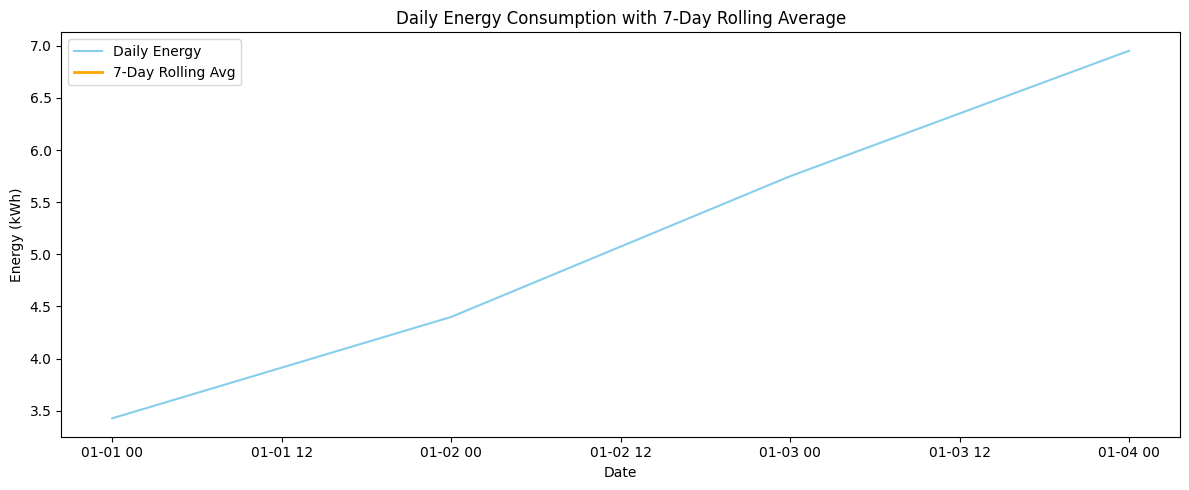

In [ ]:
import matplotlib.pyplot as plt

# Computing the 7 day rolling average
daily_energy['7d_Rolling'] = daily_energy['Energy_kWh'].rolling(window=7).mean()

plt.figure(figsize=(12,5))
plt.plot(daily_energy.index, daily_energy['Energy_kWh'], label='Daily Energy', color='skyblue')
plt.plot(daily_energy.index, daily_energy['7d_Rolling'], label='7-Day Rolling Avg', color='orange', linewidth=2)
plt.title('Daily Energy Consumption with 7-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Energy (kWh)')
plt.legend()
plt.tight_layout()
plt.show()


- Behavioral View(Heatmap of Hour vs. Day of Week)

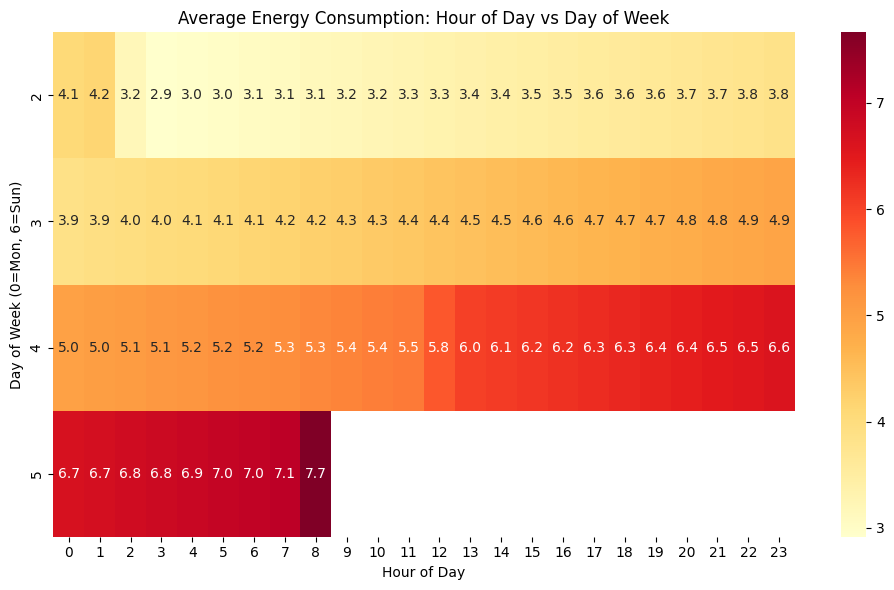

In [152]:
import seaborn as sns

# Extracting hours from original data
data['Hour'] = data.index.hour
data['Day_of_Week'] = data.index.dayofweek

# Aggregating the mean energy by Hour and Day of Week
hourly_behavior = data.groupby(['Day_of_Week','Hour'])['Energy_kWh'].mean().unstack()

# Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(hourly_behavior, cmap='YlOrRd', annot=True, fmt=".1f")
plt.title('Average Energy Consumption: Hour of Day vs Day of Week')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.tight_layout()
plt.show()
